  Updating registry at `~/.julia/registries/General`
  Updating git-repo `https://github.com/JuliaRegistries/General.git`
Fetching: [========================================>]  100.0 %.0 % Resolving package versions...
 Installed ImageMorphology ─ v0.2.2
  Updating `~/.julia/environments/v1.1/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.1/Manifest.toml`
 

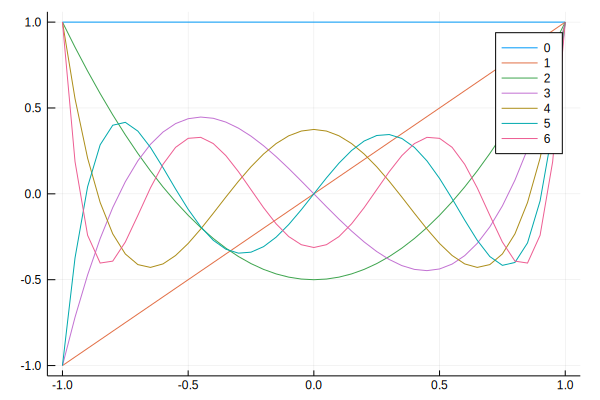

"Iteration"

2

"Gauss abcisses: "

2-element Array{Float64,1}:
 -0.5773502691896258
  0.5773502691896258

"Legenedre roots: "

2-element Array{Float64,1}:
 -0.5773502691896258
  0.5773502691896256

"Iteration"

3

"Gauss abcisses: "

3-element Array{Float64,1}:
 -0.7745966692414834
  0.0               
  0.7745966692414834

"Legenedre roots: "

3-element Array{Float64,1}:
 -0.7745966692414834
  0.7745966692414833
  0.0               

"Iteration"

4

"Gauss abcisses: "

4-element Array{Float64,1}:
 -0.8611363115940526
 -0.3399810435848563
  0.3399810435848563
  0.8611363115940526

"Legenedre roots: "

4-element Array{Float64,1}:
 -0.8611363115940536 
  0.8611363115940531 
 -0.33998104358485653
  0.3399810435848563 

 [787d08f9] ↑ ImageMorphology v0.2.1 ⇒ v0.2.2


In [1]:
# Task 1 - Legendre's polynomials - roots and plots

using Pkg, Plots
Pkg.add("QuadGK")

using QuadGK, Polynomials

function legendre(k)
    if k == 0
        return Poly([1])
    end
    
    if k == 1
        return Poly([0, 1])
    end
    
    return (2 * (k - 1) + 1) / (k) * Poly([0, 1]) * legendre(k - 1) - ((k - 1) / (k) * legendre(k - 2))
end
    
x_task_1 = -1:0.05:1

plot_task_1 = plot(x_task_1, polyval(legendre(0), x_task_1), label="0")

for i in 1:6
    plot!(x_task_1, polyval(legendre(i), x_task_1), label = string(i))
end


display(plot_task_1)

display()


for i in 2:4
    display("Iteration")
    display(i)
    (xp, a) = gauss(Float64, i)
    display("Gauss abcisses: ")
    display(xp)
    display("Legenedre roots: ")
    display(roots(legendre(i)))
end

# roots of legengre are abcisses of gauss points

In [2]:
# Task 2 - integrate from -1 to 1 using Gauss

function integrate_gauss(f, k)
    (xp, a) = gauss(Float64, k)
    return sum(a .* f.(xp))
end

f(x) = x^7 + x^6

# ANALYTICALLY

# INTEGRAL OF x^7 + x^6 from -1 to 1:
# result: 1/8 * x^8 + 1/7 * x^7
# result from -1 to 1:
# 2/7

println("integrating function: x^7 + x^6")
println("Correct result: ")
println(2/7)

print("\n")

println("k = 1: ", integrate_gauss(f, 1))
println("k = 2: ", integrate_gauss(f, 2))
println("k = 3: ", integrate_gauss(f, 3))
println("k = 4: ", integrate_gauss(f, 4))
println("k = 5: ", integrate_gauss(f, 5))
println("k = 6: ", integrate_gauss(f, 6))
println("k = 7: ", integrate_gauss(f, 7))
println("k = 8: ", integrate_gauss(f, 8))
println("k = 9: ", integrate_gauss(f, 9))
println("k = 10: ", integrate_gauss(f, 10))

# dla n-punktowej kwadratury można uzyskać stopień dokładności 2n - 1

integrating function: x^7 + x^6
Correct result: 
0.2857142857142857

k = 1: 0.0
k = 2: 0.07407407407407413
k = 3: 0.2400000000000001
k = 4: 0.2857142857142858
k = 5: 0.2857142857142858
k = 6: 0.28571428571428586
k = 7: 0.2857142857142859
k = 8: 0.2857142857142857
k = 9: 0.2857142857142859
k = 10: 0.2857142857142858


In [3]:
# Task 3 - normalized Gauss integration

function integrate_gauss(f, k)
    (xp, a) = gauss(Float64, k)
    return sum(a .* f.(xp))
end

function integrate_normalized(f, a, b, k)
    g(z) = f((b + a) / 2 + ((b - a) / 2) * z) * (b - a) / 2
    return integrate_gauss(g, k)
end


f(x) = x^7 + x^6

println()

# RESULT FOR INTEGRATION FROM -1 TO 1 FOR x^7 + x^6: 2/7

println("Result of integration function: x^7 + x^6 from -1 to 1 using integration_normalized method\n")

println("k = 4:          ", integrate_normalized(f, -1, 1, 4))

println("Correct result: ", 2/7)

println()



# RESULT FOR INTEGRATION FROM -5 TO 3 FOR THIS x^7 + x^6: -255744/7 ≈ -36535

println("Result of integration function: x^7 + x^6 from -5 to 3 using integration_normalized method \n")

println("k = 1:          ", integrate_normalized(f, -5, 3, 1))

println("k = 2:          ", integrate_normalized(f, -5, 3, 2))

println("k = 3:          ", integrate_normalized(f, -5, 3, 3))

println("k = 4:          ", integrate_normalized(f, -5, 3, 4))

println("k = 5:          ", integrate_normalized(f, -5, 3, 5))

println("k = 6:          ", integrate_normalized(f, -5, 3, 6))

println("k = 7:          ", integrate_normalized(f, -5, 3, 7))

println("k = 8:          ", integrate_normalized(f, -5, 3, 8))

println("k = 9:          ", integrate_normalized(f, -5, 3, 9))

println("k = 10:         ", integrate_normalized(f, -5, 3, 10))

println()

println("Correct result: ", -255744/7)

println()

println("Result of integration function: x^7 + x^6 from 4 to 8.5 using integration_normalized method \n")

println("k = 1:          ", integrate_normalized(f, 4, 8.5, 1))

println("k = 2:          ", integrate_normalized(f, 4, 8.5, 2))

println("k = 3:          ", integrate_normalized(f, 4, 8.5, 3))

println("k = 4:          ", integrate_normalized(f, 4, 8.5, 4))

println("k = 5:          ", integrate_normalized(f, 4, 8.5, 5))

println()

println("Correct result: ", 3.85357 * 10^6)




Result of integration function: x^7 + x^6 from -1 to 1 using integration_normalized method

k = 4:          0.2857142857142858
Correct result: 0.2857142857142857

Result of integration function: x^7 + x^6 from -5 to 3 using integration_normalized method 

k = 1:          0.0
k = 2:          -12088.888888888894
k = 3:          -32040.960000000006
k = 4:          -36534.85714285714
k = 5:          -36534.85714285712
k = 6:          -36534.85714285715
k = 7:          -36534.857142857145
k = 8:          -36534.85714285712
k = 9:          -36534.85714285715
k = 10:         -36534.85714285716

Correct result: -36534.857142857145

Result of integration function: x^7 + x^6 from 4 to 8.5 using integration_normalized method 

k = 1:          1.9446015357971191e6
k = 2:          3.7571958522949205e6
k = 3:          3.8529690566748036e6
k = 4:          3.8535662605329263e6
k = 5:          3.8535662605329254e6

Correct result: 3.85357e6


In [4]:
# Task 4 - Gauss-Kronrod integration using quadgk method

using QuadGK

f(x) = x^7 + x^6

println("Function for integration: x^7 + x^6 \n")

println("Result using quadgk: ", quadgk(f, -1, 1))

println("Correct result:       ", 2/7)

println()

println("Normal Gauss distribution from -Inf to Inf for function:  1 / sqrt(2 * pi) * exp((-x^2) / 2)")

g(x) = 1 / sqrt(2 * pi) * exp((-x^2) / 2)

println(quadgk(g, -Inf, Inf))

Function for integration: x^7 + x^6 

Result using quadgk: (0.2857142857142856, 5.551115123125783e-17)
Correct result:       0.2857142857142857

Normal Gauss distribution from -Inf to Inf for function:  1 / sqrt(2 * pi) * exp((-x^2) / 2)
(1.0000000000032583, 1.4395584941504537e-8)


"Test result of trapezoidal integration for f = x^7 + x^6 from -1 to 1"

0.3342898521817722

"Correct result of integration for f = x^7 + x^6 from -1 to 1: "

0.2857142857142857

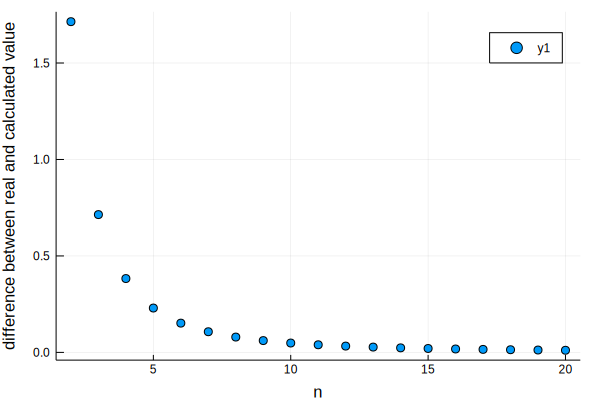

In [5]:
# Task 5 - trapezoidal integration rule
using Pkg, Plots

function trapezoidal_rule_integration(f, a, b, n)
    sum = 0
    
    single_trapezoid_width = (b - a) / (n - 1)
    
    x_of_starting_trapezoid = a
    
    for i in 1:(n - 1)
        sum = sum + 1/2 * (f(x_of_starting_trapezoid) + f(x_of_starting_trapezoid + single_trapezoid_width)) * single_trapezoid_width
        x_of_starting_trapezoid = x_of_starting_trapezoid + single_trapezoid_width
    end
    
    return sum
end


f(x) = x^7 + x^6

correct_sollution = 2/7

display("Test result of trapezoidal integration for f = x^7 + x^6 from -1 to 1")
display(trapezoidal_rule_integration(f, -1, 1, 10))

display("Correct result of integration for f = x^7 + x^6 from -1 to 1: ")

display(2/7)

error = []

xs = 2:20

for i in xs
    push!(error, abs(correct_sollution - trapezoidal_rule_integration(f, -1, 1, i)))
end

scatter(xs, error, xlabel="n", ylabel="difference between real and calculated value")